In [ ]:
#HOMEWORK1
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

# # Show image color
# image = cv2.imread(filename, 1)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(12, 8))
# plt.imshow(image)
# plt.title('Color Image')
# plt.axis('off')
# plt.show()

def histogram_equalization(image):
  #Tao array px(x) cho anh origin
  image1 = image.flatten()

  # #su dung np.histogram cua numpy
  # hist,bins = np.histogram(image1, bins = range(257)) 
  # res = hist/image1.shape

  px = np.zeros(256)
  for i in range(256):
    px[i] = len(image1[image1 == i])
  px /= image1.shape


  #Tao array cx(x) cho anh origin
  cx = np.zeros(256)
  cx[0] = px[0]
  for i in range(1, 256):
    cx[i] = cx[i - 1] + px[i]

  #Tao histogram cho cx
  col = range(256)
  plt.bar(col,cx, color = 'blue')

  #Tao histogram cho cz (phan bo tan suat deu cho cac gia tri trong khoang 0-255)
  cz = np.zeros(256)
  for i in range(256):
    cz[i] = cz[i - 1] + 1/256
  plt.bar(col,cz, color = 'green')

  #Chuyen mau tu hist cx sang hist cz
  cimage = np.zeros(len(image1))

  for i in range(len(image1)):
    sub_arr = abs(cz - cx[image1[i]])
    sub_arr = list(sub_arr)
    color = sub_arr.index(min(sub_arr))
    cimage[i] = color
  cimage = np.reshape(cimage, (image.shape[0], image.shape[1]))
  return np.array(cimage, dtype='int16')


def display_multiple_img(images, rows = 1, cols=1, size = (15,8)):
    figure, ax = plt.subplots(nrows=rows,ncols=cols, figsize=size)
    for ind,title in enumerate(images):
        ax.ravel()[ind].imshow(images[title], cmap='gray',norm=NoNorm())
        ax.ravel()[ind].set_title(title)
        ax.ravel()[ind].set_axis_off()
    plt.tight_layout()
    plt.show()

Downloading...
From: https://drive.google.com/uc?id=17dau9qAQgWsAbQks6ea2W7JWZgFJ9gCm
To: /content/db2dfe2dcc2241138f540f27dba13471-8-1586947658-1587095576704997893017.jpg
100% 55.2k/55.2k [00:00<00:00, 47.8MB/s]


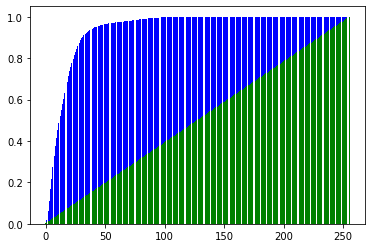

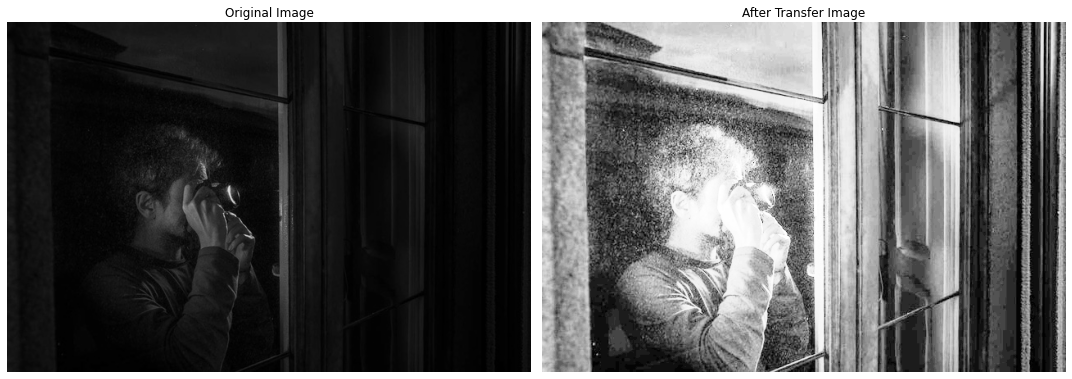

In [ ]:
!gdown --id 17dau9qAQgWsAbQks6ea2W7JWZgFJ9gCm
filename = './db2dfe2dcc2241138f540f27dba13471-8-1586947658-1587095576704997893017.jpg'

# Show image
image = cv2.imread(filename, 0)
# plt.figure(figsize=(12, 8))
# plt.imshow(image, cmap='gray',norm=NoNorm())
# plt.title('Original Image')
# plt.axis('off')
# plt.show()

cimage = histogram_equalization(image)
# # Show image
# plt.figure(figsize=(12, 8))
# plt.imshow(cimage, cmap='gray',norm=NoNorm())
# plt.title('After Transfer Image')
# plt.axis('off')
# plt.show()

images = {'Original Image': image, 'After Transfer Image': cimage}

display_multiple_img(images, 1, 2, (15,8))

In [ ]:
#HOMEWORK2
!gdown --id 1487_nmhjG_0C_Uwu8QlchNi86y71bq_h

def histogram_matching(image, image_base):
  #Tao array px(x) cho anh origin
  image1 = image.flatten()

  # #su dung np.histogram cua numpy
  # hist,bins = np.histogram(image1, bins = range(256)) 
  # res = hist/image1.shape

  px = np.zeros(256)
  for i in range(256):
    px[i] = len(image1[image1 == i])
  px /= image1.shape


  #Tao array cx(x) cho anh origin
  cx = np.zeros(256)
  cx[0] = px[0]
  for i in range(1, 256):
    cx[i] = cx[i - 1] + px[i]


  #Tao array pz(z) cho anh base
  image0 = image1.copy()
  image1 = image_base.flatten()
  pz = np.zeros(256)

  for i in range(256):
    pz[i] = len(image1[image1 == i])
  pz /= image1.shape

  #Tao array cx(x) cho anh base
  cz = np.zeros(256)
  cz[0] = px[0]
  for i in range(1, 256):
    cz[i] = cz[i - 1] + pz[i]

  #Tao histogram cho cx
  col = range(256)
  plt.bar(col,cx, color = 'blue')

  #Tao histogram cho cz
  plt.bar(col,cz, color = 'green')

  #Chuyen mau tu hist cx sang hist cz
  cimage = np.zeros(len(image0))

  for i in range(len(image0)):
    sub_arr = abs(cz - cx[image0[i]])
    sub_arr = list(sub_arr)
    color = sub_arr.index(min(sub_arr))
    cimage[i] = color
  cimage = np.reshape(cimage, (image.shape[0], image.shape[1]))
  return np.array(cimage, dtype='int16')

Downloading...
From: https://drive.google.com/uc?id=1487_nmhjG_0C_Uwu8QlchNi86y71bq_h
To: /content/44178730895_c9fbaf8542_h.jpg
100% 589k/589k [00:00<00:00, 83.8MB/s]


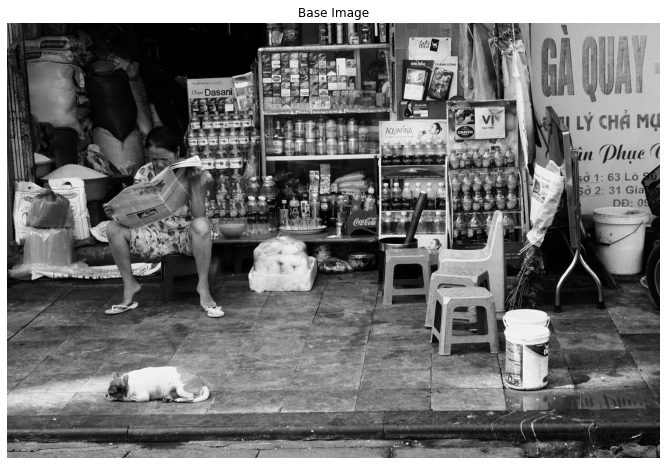

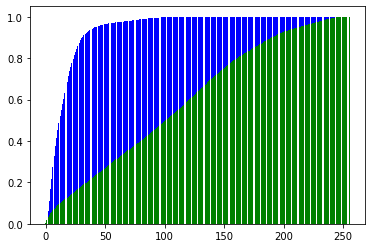

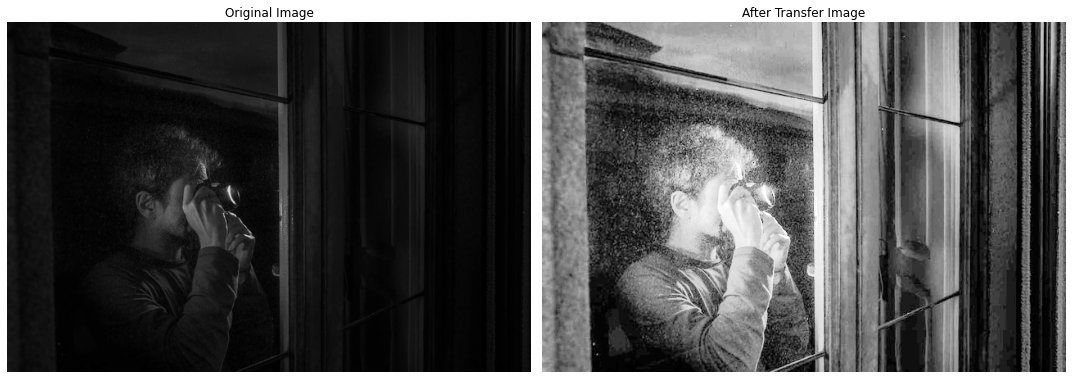

In [ ]:
filename = './44178730895_c9fbaf8542_h.jpg'
image_base = cv2.imread(filename, 0)

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image_base, cmap='gray',norm=NoNorm())
plt.title('Base Image')
plt.axis('off')
plt.show()

# Show image
# plt.figure(figsize=(12, 8))
# plt.imshow(image, cmap='gray',norm=NoNorm())
# plt.title('Original Image')
# plt.axis('off')
# plt.show()

cimage = histogram_matching(image, image_base)
# Show image
# plt.figure(figsize=(12, 8))
# plt.imshow(cimage, cmap='gray',norm=NoNorm())
# plt.title('After Transfer Image')
# plt.axis('off')
# plt.show()

images = {'Original Image': image, 'After Transfer Image': cimage}

display_multiple_img(images, 1, 2,(15,8))